# Previsão da Associação Gene-Doença

__Autores: André Filipe Moura Alves dos Santos Ramos (PG27665), João José Lopes Cheixo (PG49837), Márcia Filipa Gonçalves Oliveira (PG49841), Mariana Rochinha Braguês (PG49843)__

O presente projeto realiza-se no âmbito da unidade curricular Sistemas Inteligentes para a Bioinformática, do Mestrado em Bioinformática. 

Tem como principal objetivo a análise de um conjunto de dados, através da utilização de algoritmos de aprendizagem máquina, usando o Python como linguagem de programação.

Para uma melhor organização do projeto, este notebook está dividido em várias etapas principais:\
1 - Exploração inicial e pré-processamento;\
2 - Análise não supervisionada;\
3 - Aprendizagem de máquina;\
4 - Deep learning.

## 1 - Exploração inicial e pré-processamento

Como descrito na literatura, muitas doenças são impulsionadas por alterações genéticas. Assim, as associações gene-doença (GDA) quantificam a relação entre um par de gene e doença, sendo normalmente construída como uma rede onde podemos investigar os mecanismos gene-doença tendo em conta múltiplos fatores genéticos e determinadas doenças. 

A tarefa de previsão de associação gene-doença refere-se à previsão e à identificação de associações entre genes específicos e doenças. Esse tipo de tarefa é fundamental na área de bioinformática e genómica, uma vez que pode ajudar a compreender as bases genéticas de certas doenças, levando a avanços significativos no diagnóstico, tratamento e prevenção de doenças.

Esta previsão pode ter várias aplicações práticas, desde a descoberta de novos alvos terapêuticos até à compreensão de como variantes genéticas podem influenciar o risco de doenças específicas.

Geralmente são utilizadas técnicas de aprendizagem de máquina e análise de dados genómicos para identificar padrões e correlações entre genes e doenças em grandes conjuntos de dados.

Descrição do dataset:\
Tendo em conta as informações fornecidas, o dataset foi selecionado do Target Discovery Consortium (TDC) que utiliza o subconjunto curado de UNIPROT, CGI, ClinGen, Genomics England, CTD, PsyGeNET e Orphanet. A TDC mapeia o ID da doença para a definição da doença por meio do MedGen e mapeia o GeneID para a sequência de aminoácidos do UniProt.
A DisGeNet é uma plataforma que contém uma das maiores coleções publicamente disponíveis de genes e variantes associados a doenças humanas.
Os dados são homogeneamente anotados com vocabulários controlados e ontologias impulsionadas pela comunidade.  

O dataset é composto por 52 476 pares de gene-doença, 7 399 genes e 7 095 doenças.


### 1.1. Importação dos dados

Após rever toda a documentação disponível sobre o conjunto de dados foi, primeiramente, feito o carregamento dos mesmos. Os dados encontram-se disponíveis no site https://tdcommons.ai/multi_pred_tasks/gdi/. Para a importação dos mesmos, foi instalado o package TDC, recorrendo à linha de comandos pip install PyTDC. Então, através do TDC foi obtido o conjunto de dados 'DisGeNET' da tarefa GDA no problema de previsão múltipla. Foi criada a variável 'split' que consiste num dicionário com as chaves 'train', 'val' e 'test'.

In [2]:
from tdc.multi_pred import GDA
data = GDA(name = 'DisGeNET')
df = data.get_data()
split = data.get_split()

Found local copy...
Loading...
Done!


### 1.2. Análise exploratória dos dados

O objeto 'df' é um objeto Pandas que contém o conjunto de dados completo:

In [3]:
df

,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30
...,...,...,...,...,...
52471,100507436,MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...,C0029172,Oral Submucous Fibrosis: Irreversible FIBROSIS...,0.31
52472,100507436,MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...,C2239176,Liver carcinoma: Hepatocellular carcinoma is t...,0.40
52473,100820829,MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...,C0087031,Juvenile-Onset Still Disease: An inflammatory ...,0.30
52474,100820829,MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...,C3495559,Juvenile arthritis: Juvenile arthritis (JUVAR)...,0.30


In [4]:
split.items()

dict_items([('train',          Gene_ID                                               Gene  \
0              1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   
1              1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   
2              2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   
3              2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   
4              2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   
...          ...                                                ...   
36728  100507436  MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...   
36729  100507436  MGLGPVFLLLAGIFPFAPPGAAAEPHSLRYNLTVLSWDGSVQSGFL...   
36730  100820829  MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...   
36731  100820829  MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...   
36732  100820829  MLRSTSTVTLLSGGAARTPGAPSRRANVCRLRLTVPPESPVPEQCE...   

      Disease_ID                                            Disease     Y  
0       C0019209   Hepatomegaly: Abnormal enlarge

Visualização das primeiras 5 linhas do dataset:

In [5]:
df.head()

,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30


In [6]:
print("Nome das linhas dos dados: ", df.index) 

Nome das linhas dos dados:  RangeIndex(start=0, stop=52476, step=1)


In [7]:
print("Nome das colunas dos dados: ", df.columns)

Nome das colunas dos dados:  Index(['Gene_ID', 'Gene', 'Disease_ID', 'Disease', 'Y'], dtype='object')


In [8]:
print("Tipos de dados em cada coluna: ", df.dtypes)

Tipos de dados em cada coluna:  Gene_ID         int64
Gene           object
Disease_ID     object
Disease        object
Y             float64
dtype: object


In [9]:
print("Dimensão dos dados: ", df.shape)

Dimensão dos dados:  (52476, 5)


O nosso conjunto de dados tem 52 476 linhas e 5 colunas.

In [10]:
print(df['Y'].describe())

count    52476.000000
mean         0.370878
std          0.133592
min          0.300000
25%          0.300000
50%          0.300000
75%          0.400000
max          1.000000
Name: Y, dtype: float64


Principais estatísticas descritivas do valor Y (valor da previsão da associação entre gene e doença).
 
O valor Y é um valor entre 0 e 1 usado para representar uma probabilidade ou um valor de confiança associado à previsão da associação gene-doença. Neste contexto, valores mais próximos de 1 podem indicar uma maior probabilidade de associação entre o gene e a doença, enquanto valores mais próximos de 0 podem indicar uma menor probabilidade.

#### Gráficos exploratórios:

In [11]:
import matplotlib.pyplot as plt

Histograma da coluna 'Y' (valor de associação) para visualizar sua distribuição:

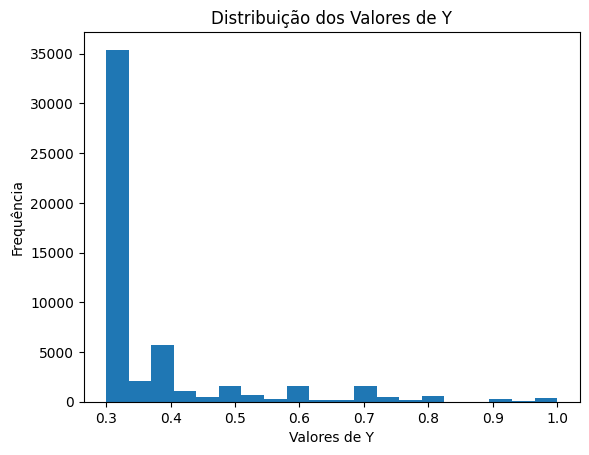

In [12]:
plt.hist(df['Y'], bins=20)
plt.xlabel('Valores de Y')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores de Y')
plt.show()

Gráfico de Barras para Valores de Associações por Gene:

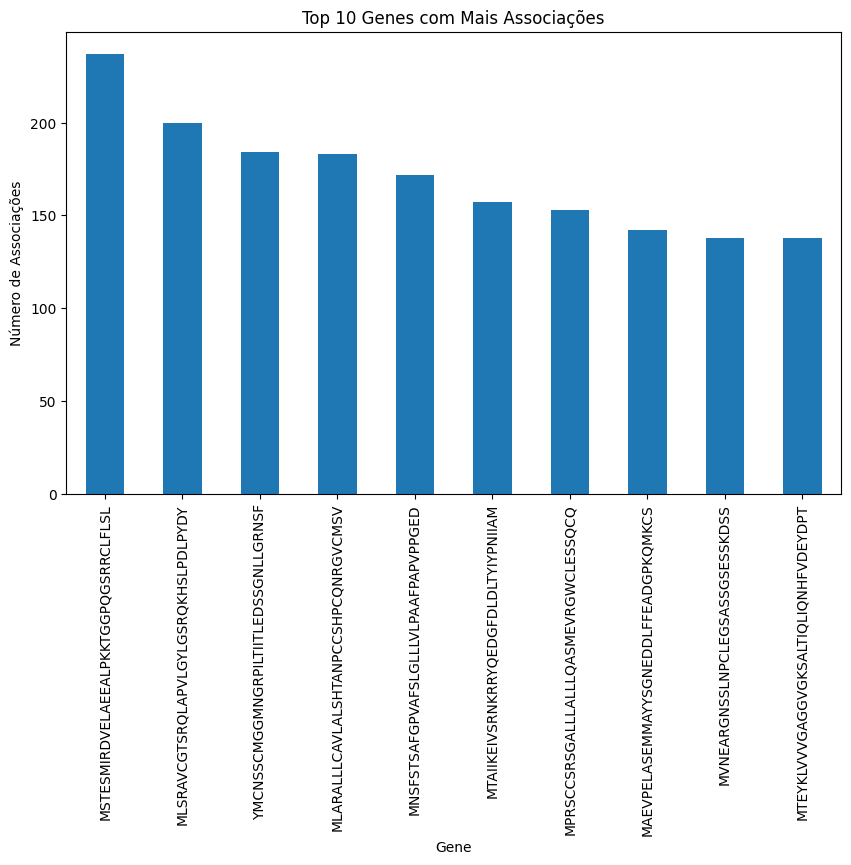

In [13]:
gene_counts = df['Gene'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10, 6))
gene_counts.plot(kind='bar', ax=ax)

labels = [text[:35] for text in gene_counts.index]
ax.set_xticklabels(labels)

plt.xlabel('Gene')
plt.ylabel('Número de Associações')
plt.title('Top 10 Genes com Mais Associações')
plt.show()

Gráfico de Barras para Valores de Associações por Doença:

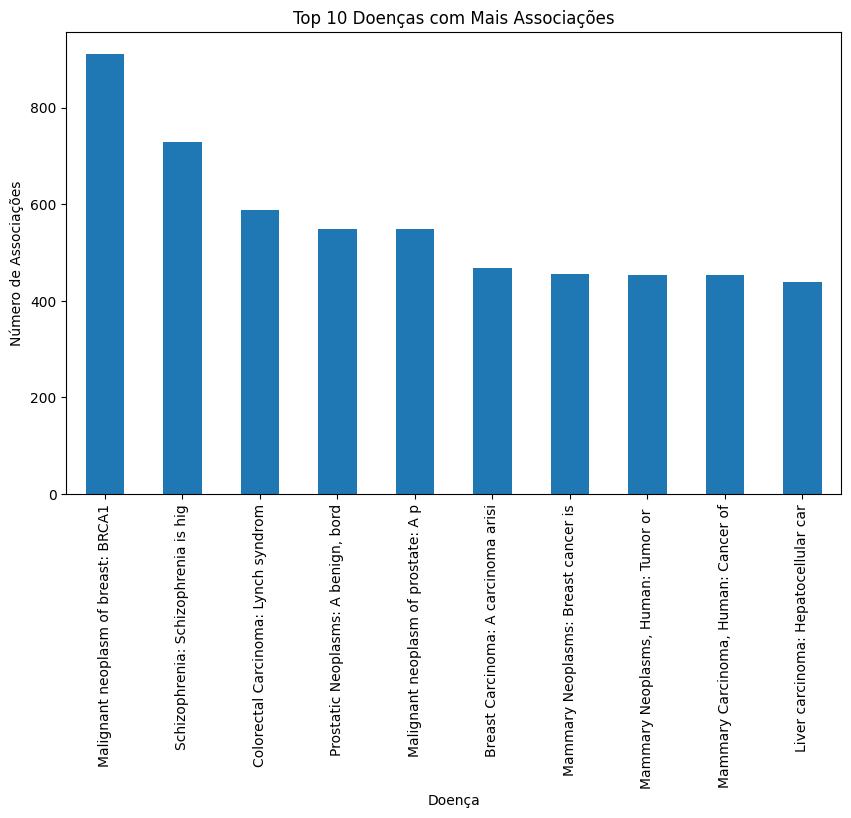

In [14]:
gene_counts = df['Disease'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10, 6))
gene_counts.plot(kind='bar', ax=ax)

labels = [text[:35] for text in gene_counts.index]
ax.set_xticklabels(labels)

plt.xlabel('Doença')
plt.ylabel('Número de Associações')
plt.title('Top 10 Doenças com Mais Associações')
plt.show()

A doença mais frequente corresponde à Neoplasia Maligna da Mama.

Gráfico de Dispersão para Relacionar 'Y' com Genes

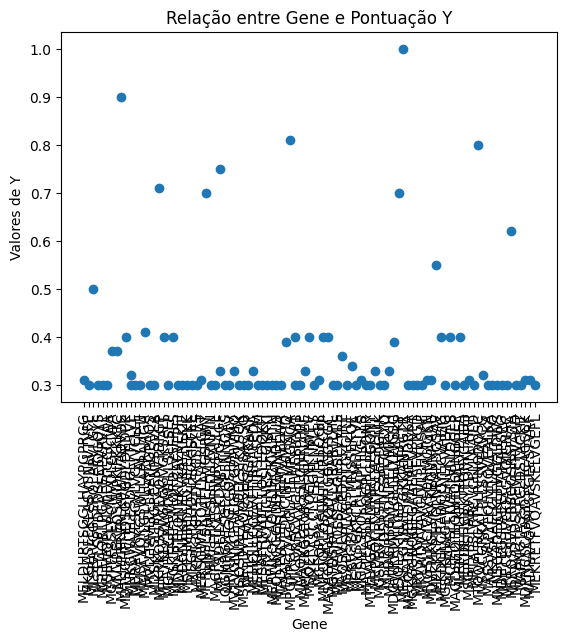

In [52]:
gene_df = df.sample(n = 100, random_state=42) #selecionar 100 linhas aleatórias do dataset

gene_df['Shortened_Gene'] = gene_df['Gene'].str.slice(0, 20)

plt.scatter(gene_df['Shortened_Gene'], gene_df['Y'])
plt.xlabel('Gene')
plt.ylabel('Valores de Y')
plt.title('Relação entre Gene e Pontuação Y')
plt.xticks(rotation=90)
plt.show()

Gráfico de Dispersão para Relacionar 'Y' com Doenças:

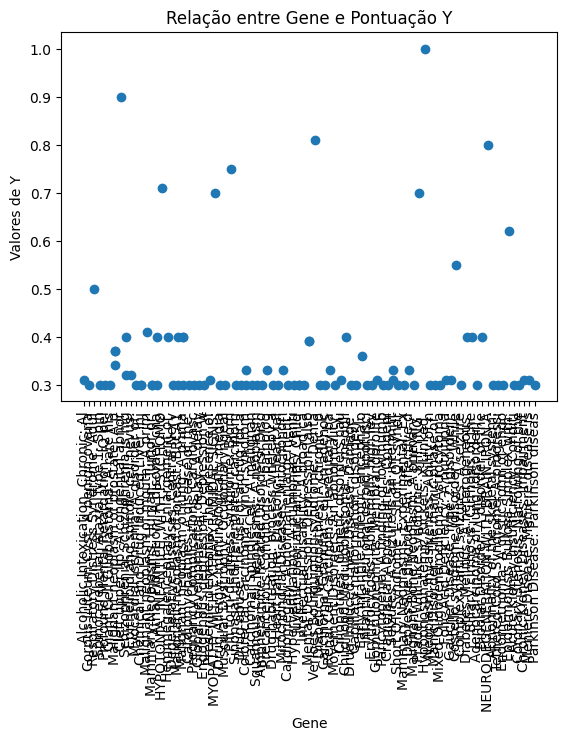

In [53]:
disease_df = df.sample(n = 100, random_state=42) #selecionar 100 linhas aleatórias do dataset

disease_df['Shortened_Disease'] = disease_df['Disease'].str.slice(0, 35)

plt.scatter(disease_df['Shortened_Disease'], disease_df['Y'])
plt.xlabel('Gene')
plt.ylabel('Valores de Y')
plt.title('Relação entre Gene e Pontuação Y')
plt.xticks(rotation=90)
plt.show()

### 1.3 Pré-processamento dos dados

Valores omissos podem indicar problemas na interpretação de dados. Para garantir a precisão e confiabilidade dos resultados deste projeto, é essencial lidar com valores omissos de maneira adequada. Ignorar esses valores pode levar a conclusões erróneas ou a resultados enviesados. Por esse motivo, fez-se a verificação da presença de valores omissos neste dataset:

In [50]:
df.isnull()

,Gene_ID,Gene,Disease_ID,Disease,Y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
52471,False,False,False,False,False
52472,False,False,False,False,False
52473,False,False,False,False,False
52474,False,False,False,False,False


In [51]:
print(df.isnull().sum())

Gene_ID       0
Gene          0
Disease_ID    0
Disease       0
Y             0
dtype: int64


Não há valores omissos, pelo que não é necessário proceder à remoção dos mesmos.

In [54]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52471    False
52472    False
52473    False
52474    False
52475    False
Length: 52476, dtype: bool

In [55]:
print(df.duplicated().sum())

0


O dataset não tem valores duplicados.

## Análise não supervisionada

### 2.1 - Técnicas de redução de dimensionalidade e de visualização

As técnicas de redução de dimensionalidade e de visualização referem-se ao processo de reduzir o número de variáveis (dimensões) no conjunto de dados, mantendo o máximo de informações possível, permitindo simplificar a complexidade dos dados, eliminar ruídos e redundâncias e salientar as características mais importantes, através de uma representação gráfica ou visual dos dados de forma a torná-los compreensíveis para análise humana.

Contextualizando, estas técnicas podem ser utéis para reduzir a dimensão dos dados gene-doença, uma vez que o número de genes e doenças presentes no dataset é elevado, permitindo uma visualização mais fácil e a identificação de padrões relevantes.

O PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade utilizada para identificar padrões nos dados, visando a representação dos dados num novo espaço de menor dimensão (com menos variáveis) mantendo o máximo possível da variabilidade original.

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [97]:
# Selecionando as colunas relevantes do DataFrame ('Gene', 'Disease', 'Y')
relevant_columns = ['Gene', 'Disease', 'Y']
selected_data = df[relevant_columns]

# Codificação das variáveis categóricas ('Gene' e 'Disease')
label_encoder = LabelEncoder()
selected_data['Gene_Encoded'] = label_encoder.fit_transform(selected_data['Gene'])
selected_data['Disease_Encoded'] = label_encoder.fit_transform(selected_data['Disease'])

# Normalização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data[['Gene_Encoded', 'Disease_Encoded', 'Y']])

# Inicialização do PCA
n = 3
pca = PCA(n_components=n)  
principal_components = pca.fit(scaled_data)
x = pca.transform(scaled_data)

# Verificando a variância explicada por cada componente principal
print(pca.explained_variance_ratio_)


[0.33661144 0.33394014 0.32944842]


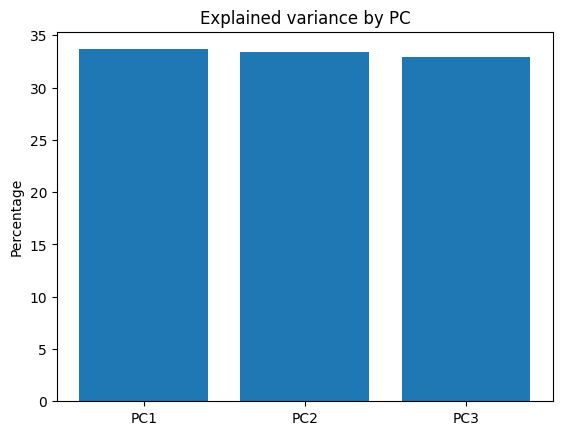

In [98]:
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Explained variance by PC")
plt.ylabel("Percentage")
plt.show()

Com base nos valores obtidos e no gráfico acima aprensentado, observa-se que a variância explicada por cada um dos componentes principais obtidos no PCA:
- 0.3366 é a variância explicada pelo primeiro componente principal.
- 0.3339 é a variância explicada pelo segundo componente principal.
- 0.3294 é a variância explicada pelo terceiro componente principal.\
Estes valores indicam quanto da variabilidade total dos dados é explicada por cada um dos componentes principais. 

Os três componentes principais obtidos através do PCA foram muito semelhantes.

Isto pode sugerir que os genes e as doenças possuem interações ou relações que são representadas de forma semelhante, podendo indicar que certos grupos de genes estão fortemente associados a determinadas doenças de maneira consistente.

Por outro lado, a similaridade entre os componentes principais pode refletir padrões genéticos comuns que contribuem para várias doenças, indicando que certos conjuntos de genes partilham características semelhantes, possivelmente apontando para predisposições genéticas comuns.

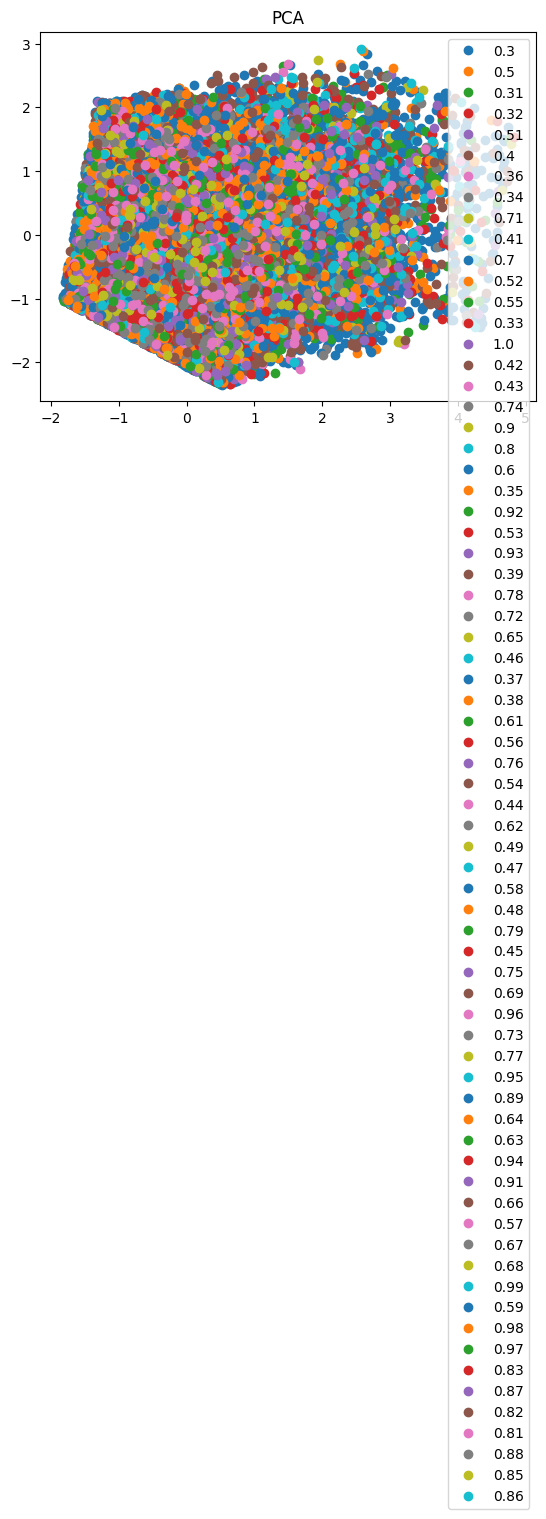

In [99]:
for y in df['Y'].unique():
    sp = df.index[df['Y']==y]-1
    plt.plot(x[sp,0],x[sp,1], 'o' , label=y)
    
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

A técnica t-SNE (t-distributed Stochastic Neighbor Embedding) é uma técnica de redução de dimensionalidade utilizada principalmente para visualizar conjuntos de dados de alta dimensionalidade num espaço de menor dimensão, de forma a preservar a estrutura de proximidade entre os pontos. Pontos que são semelhantes em alta dimensão tendem a ser mapeados próximos no espaço de menor dimensão.

Reduz a dimensionalidade do conjunto de dados original para uma visualização mais clara e compreensível, mantendo as relações de proximidade entre os pontos.

Esta técnica calcula as similaridades entre os pontos no espaço de alta dimensão, usando uma distribuição de probabilidade baseada na distância entre os pontos.

In [104]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=n, n_iter=500)
tsne_results = tsne.fit_transform(scaled_data)

In [106]:
import seaborn as sns 

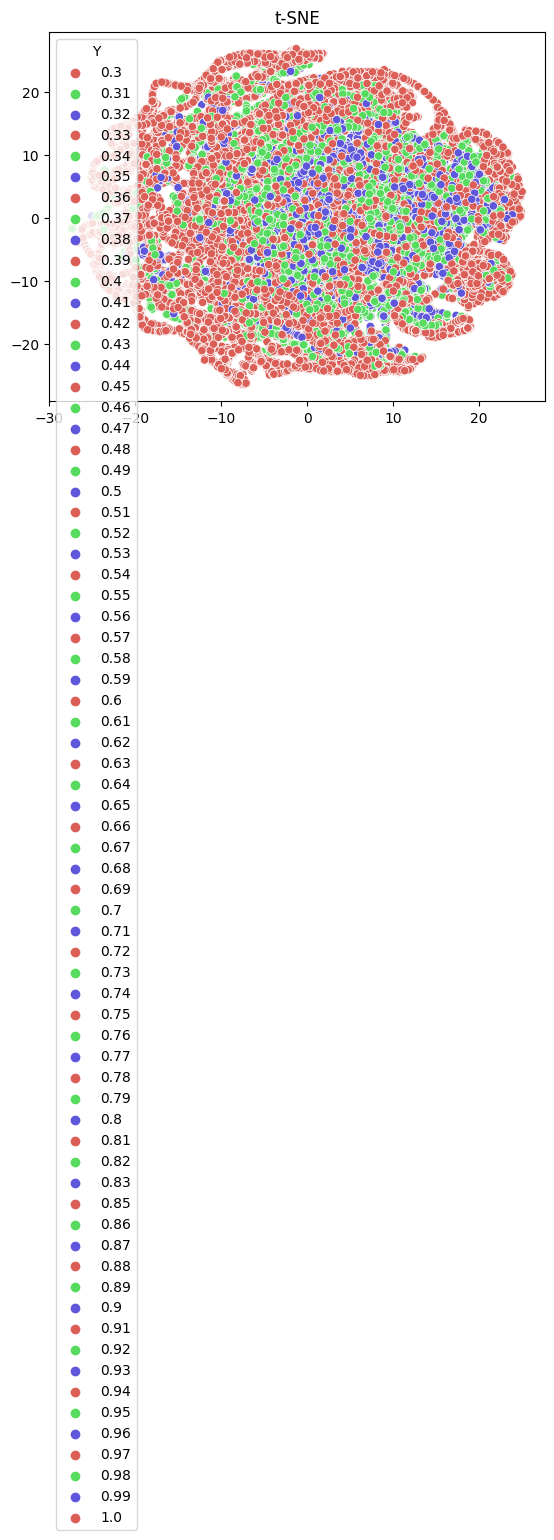

In [107]:
fig = sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="Y",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
).set(title="t-SNE")

### 2.2 - Métodos de clustering

Os métodos de clustering referem-se a técnicas que agrupam dados similares em grupos (clusters) com base nas suas características, identificando padrões intrínsecos nos dados e agrupando elementos similares.

Neste contexto, estes métodos podem ajudar a identificar grupos de genes ou doenças que estão associados de maneira semelhante, possibilitando a análise de conjuntos de genes/doenças com comportamentos comuns. Podem ainda revelar grupos naturais de genes/doenças associados, ajudando a identificar subgrupos funcionais ou patológicos.

In [115]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [134]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, n_init = 10)

kmeans.fit(scaled_data)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

pd.crosstab(labels, df["Y"], rownames=['clusters'])

Y,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
clusters,,,,,,,,,,,,,,,,,,,,,
0,8178,1607,732,490,350,241,160,178,146,102,...,0,0,0,0,0,0,0,0,0,0
1,10794,1689,754,506,297,214,171,124,100,113,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,38,24,23,20,21,16,12,13,9,335
3,7999,1458,727,460,285,211,175,125,107,86,...,0,0,0,0,0,0,0,0,0,0


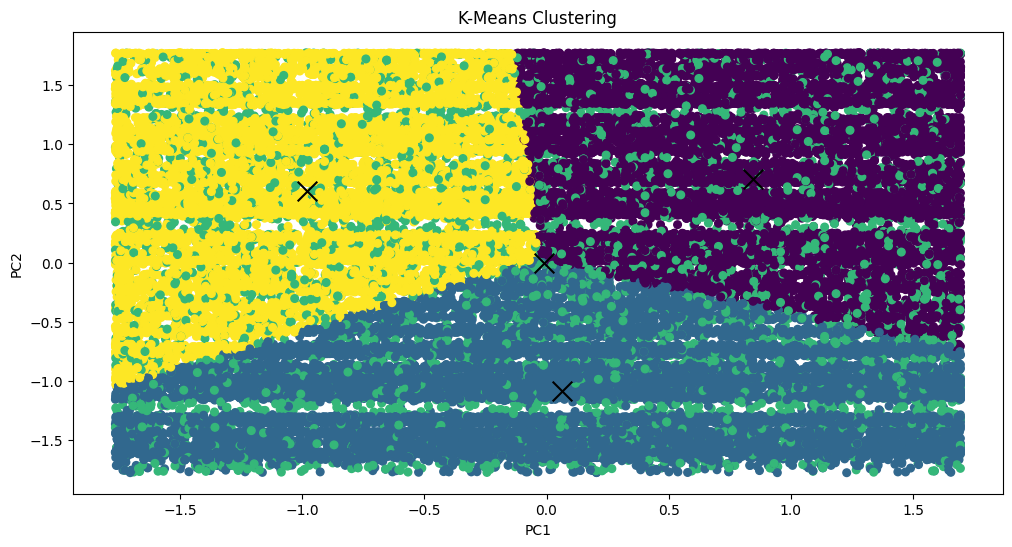

In [135]:
plt.figure(figsize=(12, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

K-means clustering utilizando quatro clusters.

Apresentou bastante sobreposição (elevado número de amostras), mas três grupos encontram-se agrupados relativamente aos centróides.

Referências:\
[1] Piñero, Janet, et al. “The DisGeNET knowledge platform for disease genomics: 2019 update.” Nucleic acids research 48.D1 (2020): D845-D855.\
[2] Halavi, Maryam, et al. “MedGen.” The NCBI Handbook [Internet]. 2nd edition. National Center for Biotechnology Information (US), 2018.\
Dataset License: CC BY-NC-SA 4.0.